In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pickle
# import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [11]:
rename = {"sb": "Small Batch", "lb": "Large Batch", "InvertedPendulum": "Inverted Pendulum"}

def gen_plot(file_prefix, _DEBUG=False):
    files = glob.glob(f"data/{file_prefix}*")
    print(files)
    
    plt.figure()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        times, step_nums, vals = zip(*event_acc.Scalars('Eval_AverageReturn'))

        lbl = file.split("q2_pg_")[1].split("-v0")[0]
        plt.plot(step_nums, np.array(vals), label=lbl)
        plt.legend()
        ttl1 = file.split("-v0")[0].split("_")[-1].split(".")[0]
        ttl1 = rename.get(ttl1, ttl1)
        ttl2 = lbl.split('_')[1]
        ttl2 = rename.get(ttl2, ttl2)
        # print(ttl1, ttl2)
        if ttl1 != ttl2: ttl1 += f" ({ttl2})"
        plt.title(ttl1)
    plt.xlabel('Iteration')
    plt.ylabel('Average Return')
    plt.show()

['data\\q2_pg_cartpole_sb_CartPole-v0_24-09-2023_16-20-17', 'data\\q2_pg_cartpole_sb_rtg_CartPole-v0_24-09-2023_16-21-45']


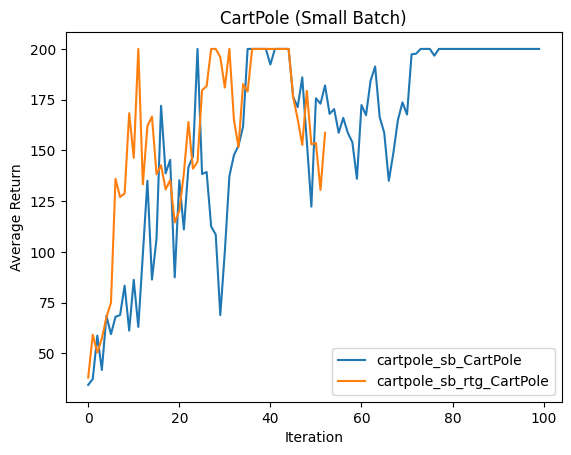

In [12]:
gen_plot("q2_pg_cartpole_sb")